# import 및 한글 인코딩


In [1]:
# # 한글깨짐 현상 -> 파일 열자마자 설치하고 주석처리 한 다음에 런타임 다시 돌리기 !
# !sudo apt-get install -y fonts-nanum
# !sudo fc-cache -fv
# !rm ~/.cache/matplotlib -rf

In [2]:
import pandas as pd
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import math

plt.rc('font', family='NanumBarunGothic')

In [3]:
df = pd.read_csv('/content/drive/MyDrive/세종시/data/7.세종시_아파트(전월세)_실거래가.csv')
df.head()

,계약년월,계약일,시군구,본번,부번,단지명,전월세구분,전용면적(㎡),보증금(만원),월세(만원),층,건축년도
0,201701,13,세종특별자치시 고운동,1396,0,가락마을 20단지(호반베르디움5차),전세,84.9895,"10,000",0,13,2015
1,201701,14,세종특별자치시 고운동,1396,0,가락마을 20단지(호반베르디움5차),전세,84.9895,"18,000",0,19,2015
2,201701,14,세종특별자치시 고운동,1396,0,가락마을 20단지(호반베르디움5차),전세,59.8338,"17,000",0,10,2015
3,201701,15,세종특별자치시 고운동,1396,0,가락마을 20단지(호반베르디움5차),전세,84.9895,"17,000",0,2,2015
4,201702,4,세종특별자치시 고운동,1396,0,가락마을 20단지(호반베르디움5차),월세,84.9895,"10,000",30,13,2015


# 전처리

In [4]:
# object 형인 보증금액 --> 수치형으로 변환
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38895 entries, 0 to 38894
Data columns (total 12 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   계약년월     38895 non-null  int64  
 1   계약일      38895 non-null  int64  
 2   시군구      38895 non-null  object 
 3   본번       38895 non-null  object 
 4   부번       38895 non-null  int64  
 5   단지명      38895 non-null  object 
 6   전월세구분    38895 non-null  object 
 7   전용면적(㎡)  38895 non-null  float64
 8   보증금(만원)  38895 non-null  object 
 9   월세(만원)   38895 non-null  int64  
 10  층        38895 non-null  int64  
 11  건축년도     38895 non-null  int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 3.6+ MB


In [5]:
df['보증금(만원)'] = df['보증금(만원)'].str.replace(',', '').astype('int64')
df.head()

,계약년월,계약일,시군구,본번,부번,단지명,전월세구분,전용면적(㎡),보증금(만원),월세(만원),층,건축년도
0,201701,13,세종특별자치시 고운동,1396,0,가락마을 20단지(호반베르디움5차),전세,84.9895,10000,0,13,2015
1,201701,14,세종특별자치시 고운동,1396,0,가락마을 20단지(호반베르디움5차),전세,84.9895,18000,0,19,2015
2,201701,14,세종특별자치시 고운동,1396,0,가락마을 20단지(호반베르디움5차),전세,59.8338,17000,0,10,2015
3,201701,15,세종특별자치시 고운동,1396,0,가락마을 20단지(호반베르디움5차),전세,84.9895,17000,0,2,2015
4,201702,4,세종특별자치시 고운동,1396,0,가락마을 20단지(호반베르디움5차),월세,84.9895,10000,30,13,2015


In [6]:
# '동네' 컬럼 추출하기

df['동네'] = df.시군구.str.split(' ').str[1]
df.head()

,계약년월,계약일,시군구,본번,부번,단지명,전월세구분,전용면적(㎡),보증금(만원),월세(만원),층,건축년도,동네
0,201701,13,세종특별자치시 고운동,1396,0,가락마을 20단지(호반베르디움5차),전세,84.9895,10000,0,13,2015,고운동
1,201701,14,세종특별자치시 고운동,1396,0,가락마을 20단지(호반베르디움5차),전세,84.9895,18000,0,19,2015,고운동
2,201701,14,세종특별자치시 고운동,1396,0,가락마을 20단지(호반베르디움5차),전세,59.8338,17000,0,10,2015,고운동
3,201701,15,세종특별자치시 고운동,1396,0,가락마을 20단지(호반베르디움5차),전세,84.9895,17000,0,2,2015,고운동
4,201702,4,세종특별자치시 고운동,1396,0,가락마을 20단지(호반베르디움5차),월세,84.9895,10000,30,13,2015,고운동


In [7]:
# 전월세 상관없이 전세로 모두 바꾸어주는 작업

df['전세보증금'] = df['월세(만원)'] *12*100/2.5  # 전세금 구하는 공식
df.head()

,계약년월,계약일,시군구,본번,부번,단지명,전월세구분,전용면적(㎡),보증금(만원),월세(만원),층,건축년도,동네,전세보증금
0,201701,13,세종특별자치시 고운동,1396,0,가락마을 20단지(호반베르디움5차),전세,84.9895,10000,0,13,2015,고운동,0.0
1,201701,14,세종특별자치시 고운동,1396,0,가락마을 20단지(호반베르디움5차),전세,84.9895,18000,0,19,2015,고운동,0.0
2,201701,14,세종특별자치시 고운동,1396,0,가락마을 20단지(호반베르디움5차),전세,59.8338,17000,0,10,2015,고운동,0.0
3,201701,15,세종특별자치시 고운동,1396,0,가락마을 20단지(호반베르디움5차),전세,84.9895,17000,0,2,2015,고운동,0.0
4,201702,4,세종특별자치시 고운동,1396,0,가락마을 20단지(호반베르디움5차),월세,84.9895,10000,30,13,2015,고운동,14400.0


In [8]:
df['전세보증금(최종)'] = df['전세보증금'] + df['보증금(만원)']
df.head()

,계약년월,계약일,시군구,본번,부번,단지명,전월세구분,전용면적(㎡),보증금(만원),월세(만원),층,건축년도,동네,전세보증금,전세보증금(최종)
0,201701,13,세종특별자치시 고운동,1396,0,가락마을 20단지(호반베르디움5차),전세,84.9895,10000,0,13,2015,고운동,0.0,10000.0
1,201701,14,세종특별자치시 고운동,1396,0,가락마을 20단지(호반베르디움5차),전세,84.9895,18000,0,19,2015,고운동,0.0,18000.0
2,201701,14,세종특별자치시 고운동,1396,0,가락마을 20단지(호반베르디움5차),전세,59.8338,17000,0,10,2015,고운동,0.0,17000.0
3,201701,15,세종특별자치시 고운동,1396,0,가락마을 20단지(호반베르디움5차),전세,84.9895,17000,0,2,2015,고운동,0.0,17000.0
4,201702,4,세종특별자치시 고운동,1396,0,가락마을 20단지(호반베르디움5차),월세,84.9895,10000,30,13,2015,고운동,14400.0,24400.0


#불필요한 컬럼 삭제

In [9]:
df2 = df.drop(['계약년월', '계약일','시군구','본번','부번','단지명','월세(만원)','전세보증금'],axis=1)
df2.head()

,전월세구분,전용면적(㎡),보증금(만원),층,건축년도,동네,전세보증금(최종)
0,전세,84.9895,10000,13,2015,고운동,10000.0
1,전세,84.9895,18000,19,2015,고운동,18000.0
2,전세,59.8338,17000,10,2015,고운동,17000.0
3,전세,84.9895,17000,2,2015,고운동,17000.0
4,월세,84.9895,10000,13,2015,고운동,24400.0


# One hot encoding

In [10]:
# 동네 인코딩
df_oh1 = pd.get_dummies(df2['동네'])
df_oh1.head()

,고운동,금남면,나성동,다정동,대평동,도담동,반곡동,보람동,부강면,새롬동,소담동,소정면,아름동,어진동,연동면,연서면,장군면,전동면,전의면,조치원읍,종촌동,한솔동,해밀동
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [11]:
# 전월세 인코딩
df_oh2 = pd.get_dummies(df2['전월세구분'])
df_oh2.head()

,월세,전세
0,0,1
1,0,1
2,0,1
3,0,1
4,1,0


In [12]:
df_oh = pd.concat([df2,df_oh1,df_oh2],axis=1)
df_oh.head()

,전월세구분,전용면적(㎡),보증금(만원),층,건축년도,동네,전세보증금(최종),고운동,금남면,나성동,다정동,대평동,도담동,반곡동,보람동,부강면,새롬동,소담동,소정면,아름동,어진동,연동면,연서면,장군면,전동면,전의면,조치원읍,종촌동,한솔동,해밀동,월세,전세
0,전세,84.9895,10000,13,2015,고운동,10000.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,전세,84.9895,18000,19,2015,고운동,18000.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,전세,59.8338,17000,10,2015,고운동,17000.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,전세,84.9895,17000,2,2015,고운동,17000.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,월세,84.9895,10000,13,2015,고운동,24400.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [13]:
# 원핫 인코딩 후 불필요한 컬럼 삭제
df_oh.drop(['전월세구분','보증금(만원)','동네'], axis=1, inplace=True)
df_oh.head()

,전용면적(㎡),층,건축년도,전세보증금(최종),고운동,금남면,나성동,다정동,대평동,도담동,반곡동,보람동,부강면,새롬동,소담동,소정면,아름동,어진동,연동면,연서면,장군면,전동면,전의면,조치원읍,종촌동,한솔동,해밀동,월세,전세
0,84.9895,13,2015,10000.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,84.9895,19,2015,18000.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,59.8338,10,2015,17000.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,84.9895,2,2015,17000.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,84.9895,13,2015,24400.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


#heatmap

In [14]:
df_oh.columns

Index(['전용면적(㎡)', '층', '건축년도', '전세보증금(최종)', '고운동', '금남면', '나성동', '다정동', '대평동',
       '도담동', '반곡동', '보람동', '부강면', '새롬동', '소담동', '소정면', '아름동', '어진동', '연동면',
       '연서면', '장군면', '전동면', '전의면', '조치원읍', '종촌동', '한솔동', '해밀동', '월세', '전세'],
      dtype='object')

In [15]:
# heatmap을 위한 컬럼 순서 변경

df_oh=df_oh[['전용면적(㎡)', '층', '건축년도', '고운동', '금남면', '나성동', '다정동', '대평동',
       '도담동', '반곡동', '보람동', '부강면', '새롬동', '소담동', '소정면', '아름동', '어진동', '연동면',
       '연서면', '장군면', '전동면', '전의면', '조치원읍', '종촌동', '한솔동', '해밀동', '월세', '전세', '전세보증금(최종)']]

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


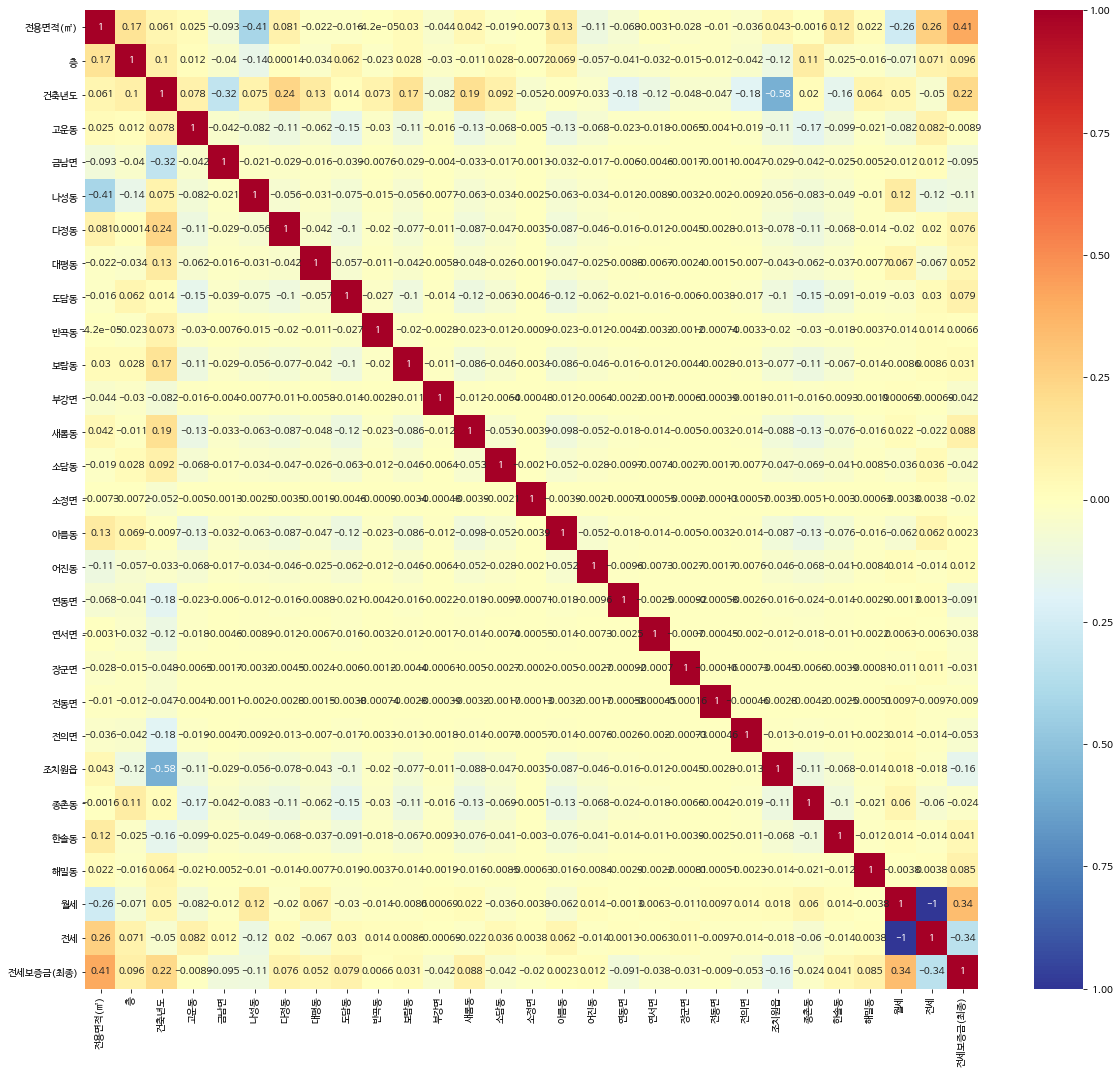

In [16]:
plt.figure(figsize=(20,18))
sns.heatmap(df_oh.corr(), annot=True, cmap = 'RdYlBu_r',vmin = -1, vmax = 1)
plt.show()

In [17]:
df_oh.drop(['층','고운동','금남면','다정동', '대평동', '도담동', '반곡동', '보람동', '부강면', '새롬동', '소담동', '소정면', '아름동', '어진동', '연동면', '연서면', '장군면', '전동면', '전의면', '종촌동', '한솔동', '해밀동'], axis=1, inplace=True)


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


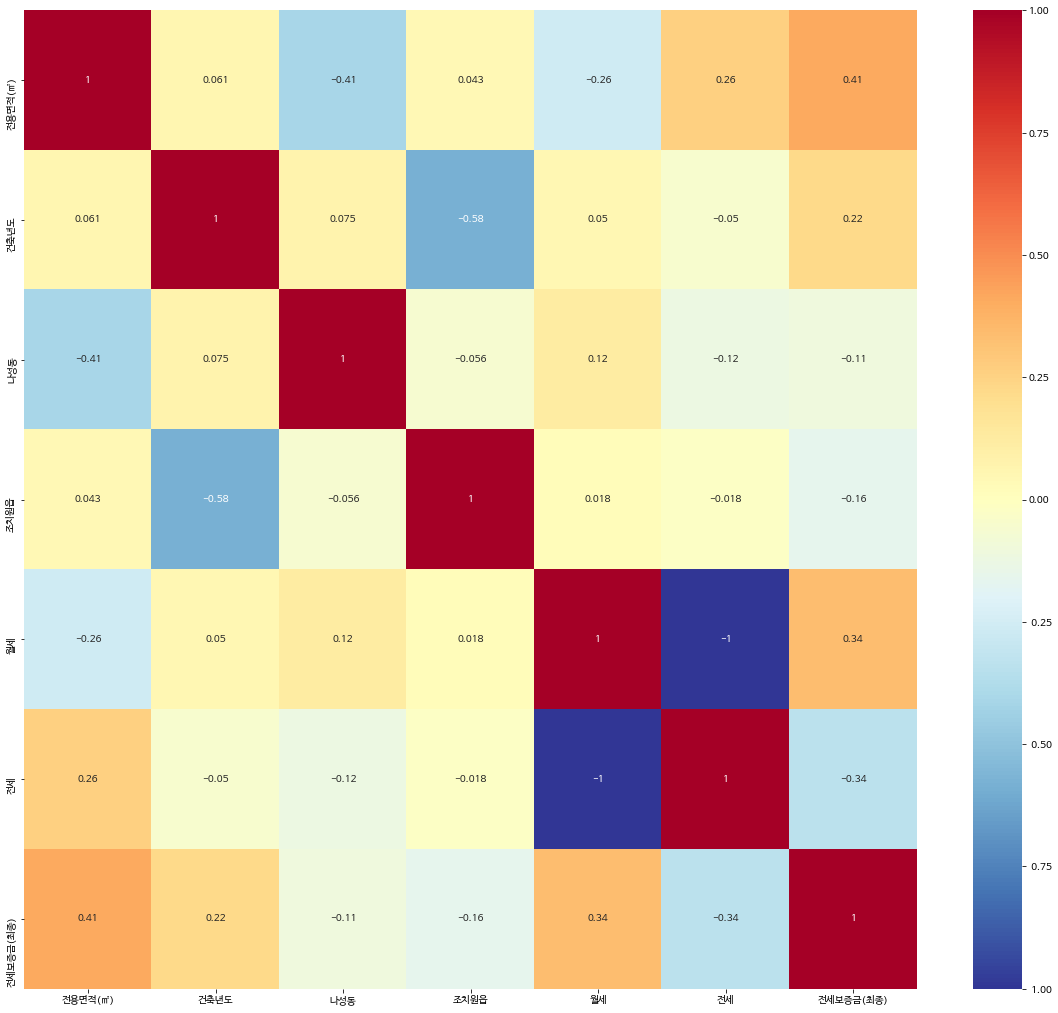

In [18]:
plt.figure(figsize=(20,18))
sns.heatmap(df_oh.corr(), annot=True, cmap = 'RdYlBu_r',vmin = -1, vmax = 1)
plt.show()

# 결론 
- 전월세이므로 대학이 위치한 조치원읍이 영향을 주는 것으로 추측
- 세종시 나성동 : 부촌으로 유명한 동네 , 주상복합문화센터도 들어설 예정